In [1]:
'''Tools in development'''

'Tools in development'

In [11]:
#packages
from test_teamrise.toolbox import extract, Objective_Tree, flat_graph
from openpyxl import load_workbook

def extract_team_id(user_list):
    out=dict()
    for user in user_list :
        out[user['id']]=user['team_id']
    return out

In [3]:
#loading file
wb = load_workbook('data/Test Dev- Dataset.xlsx')
wb.get_sheet_names()

['users', 'objectives']

In [4]:
#load worksheets
users = wb["users"]
objectives = wb["objectives"]
fv,v=extract(objectives)
fu,u=extract(users)

In [5]:
#create tree
T=Objective_Tree(v)

In [6]:
#fill missing fields
T.compute_children_progress()
T.fill_level_and_team(extract_team_id(u))

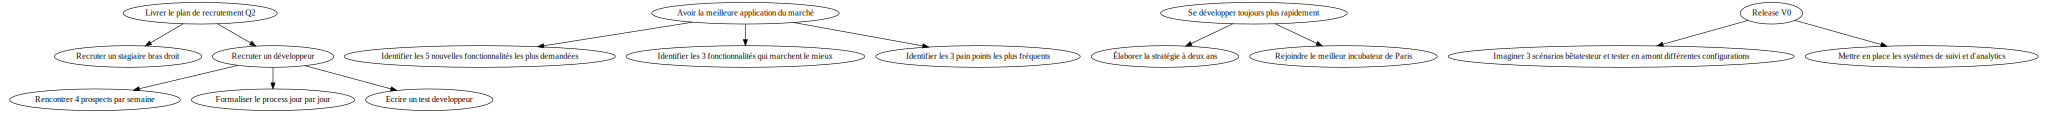

In [7]:
T.to_graph(function=lambda x: x['title'] )

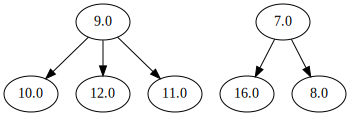

In [8]:
T.filter_at_root(lambda x: (x['team_id']==12)).to_graph()

In [13]:
flat_graph(T.filter_at_elements(lambda x: (x['level']==1)), function=lambda x: x['title'] )